In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Netflix dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/netflixDataset/netflix_titles.csv')
df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(8807, 12)

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Analysis of Movies vs TV Shows

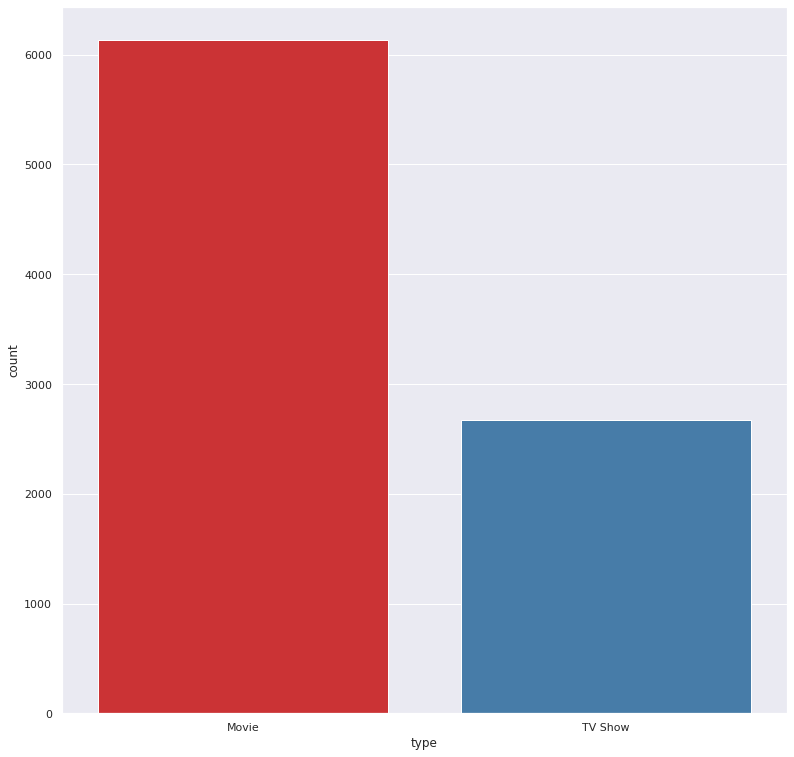

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set1")

# Year wise analysis

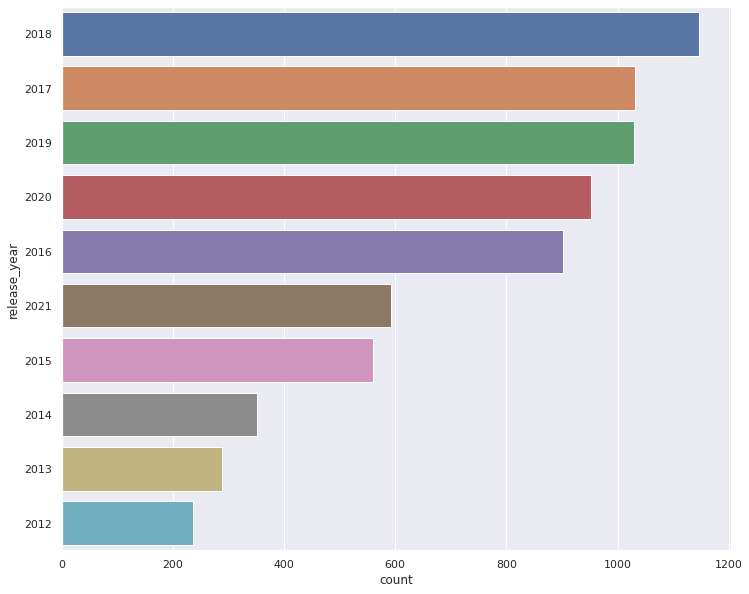

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df, order=df['release_year'].value_counts().index[0:10])

# TV Parental Guidelines rating analysis

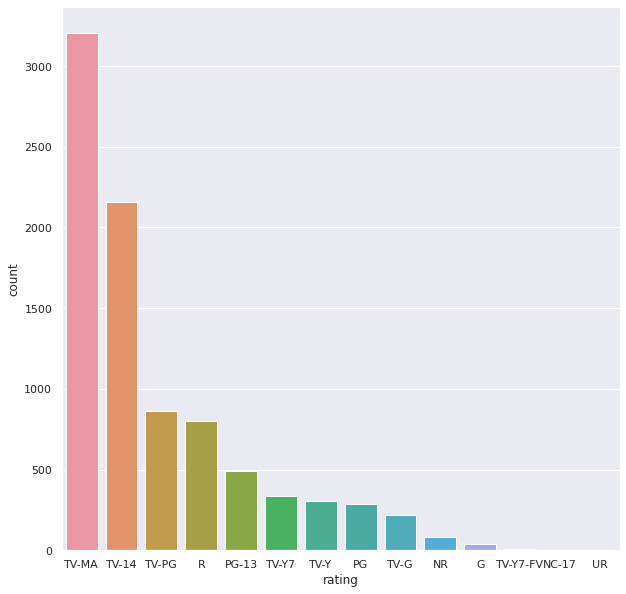

In [ ]:
plt.figure(figsize=(10,10))
rating = sns.countplot(x='rating', data=df,order = df['rating'].value_counts().index[0:-3])

There are more than 3000 movies with TV-MA rating, 'TV-MA' rating is suitable only for the mature audiences assigned by the the TV Parental Guidelines.
Second highest rating is the TV-14 with slightly much than 2000 movies, which says that the content is not appropriate for children younger than 14 years.

# Latest releases from Italy

In [ ]:
import plotly.graph_objects as go

In [ ]:
IT = df[df['country']=='Italy']

In [ ]:
latest_IT = IT.sort_values(by='release_year', ascending = False)[:10]

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year', 'type', 'duration']),
                              cells = dict(values=[latest_IT['title'], latest_IT['release_year'], latest_IT['type'], latest_IT['duration']]))])
fig.show()

# Wordcloud for genres

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

In [ ]:
genre = list(df['listed_in'])
gen=[]
for i in genre:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ""))
g = Counter(gen)

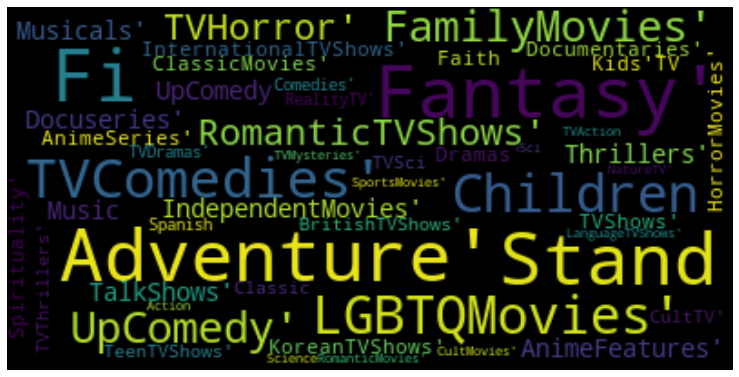

In [ ]:
plt.rcParams['figure.figsize']=(13,13)
text = list(set(gen))
wordcloud = WordCloud(max_font_size=40,max_words=50).generate(str(text))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Loading the IMDb datasets

In [ ]:
ratings = pd.read_csv('drive/MyDrive/imdbDataset/IMDbRatings.csv',usecols=['weighted_average_vote'])
print(ratings.shape)
titles = pd.read_csv('drive/MyDrive/imdbDataset/IMDbMovies.csv',usecols=['title','year','genre'])        
print(titles.shape)                                                        

(85855, 1)
(85855, 3)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
rating = pd.DataFrame({'Title':titles.title,
                       'Release Year':titles.year,
                       'Rating':ratings.weighted_average_vote,
                       'Genre':titles.genre})

In [ ]:
rating.drop_duplicates(subset=['Title','Release Year','Rating'], inplace = True)

In [ ]:
rating.dropna()

,Title,Release Year,Rating,Genre
0,Miss Jerry,1894,5.9,Romance
1,The Story of the Kelly Gang,1906,6.1,"Biography, Crime, Drama"
2,Den sorte drøm,1911,5.8,Drama
3,Cleopatra,1912,5.2,"Drama, History"
4,L'Inferno,1911,7.0,"Adventure, Drama, Fantasy"
...,...,...,...,...
85850,Le lion,2020,5.3,Comedy
85851,De Beentjes van Sint-Hildegard,2020,7.7,"Comedy, Drama"
85852,Padmavyuhathile Abhimanyu,2019,7.9,Drama
85853,Sokagin Çocuklari,2019,6.4,"Drama, Family"


# Merging datasets

Now here we are performing the inner join on the ratings dataset and the netflix dataset to get the content that has both ratings on netflix and IMDB.

In [ ]:
datajoin = rating.merge(df,left_on = 'Title', right_on='title', how = 'inner')
datajoin = datajoin.sort_values(by='Rating', ascending=False)

# Top 10 rated contents on Netflix

In [ ]:
import plotly.express as px
top10 = datajoin[0:10]
fig = px.sunburst(top10, path=['title'], values='Rating', color='Rating')
fig.show()

# Content based filtering on multiple metrics

Content based filtering on the following factors:
* Title
* Cast
* Director
* Listed in
* Plot

Filling null values with empty string.

In [ ]:
# Filling null values with empty string

filledna=datajoin.fillna('')
filledna.head()

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1105,Innocent,2017,9.0,Comedy,s4175,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."
1116,Breakout,2019,9.0,"Adventure, Comedy, Drama",s5394,TV Show,Breakout,,"Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...",,"July 1, 2017",2010,TV-14,1 Season,"International TV Shows, TV Dramas",After losing her family in a suspicious car cr...
441,Pulp Fiction,1994,8.9,"Crime, Drama",s7803,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...
421,Schindler's List,1993,8.9,"Biography, Drama, History",s7958,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...
1442,Inception,2010,8.8,"Action, Adventure, Sci-Fi",s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...


Cleaning the data - making all the words lower case

In [ ]:
# Cleaning the data by making the words lower case

def clean_data(x):
        return str.lower(x.replace(" ", ""))

Identifying features on which the model is to be filtered.

In [ ]:
# Identifying features on which the model has to be filtered.

features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [ ]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head()

,title,director,cast,listed_in,description
1105,innocent,serenyüce,"aliatay,halukbilginer,nursürer,okanyalabık,tül...","crimetvshows,internationaltvshows,tvdramas","inapeaceful,rustictown,aretiredofficerandhisfa..."
1116,breakout,,"jeanetteaw,elvinng,zhouying,christopherlee,dai...","internationaltvshows,tvdramas","afterlosingherfamilyinasuspiciouscarcrash,awom..."
441,pulpfiction,quentintarantino,"johntravolta,samuell.jackson,umathurman,harvey...","classicmovies,cultmovies,dramas",thisstylizedcrimecaperweavestogetherstoriesfea...
421,schindler'slist,stevenspielberg,"liamneeson,benkingsley,ralphfiennes,carolinego...","classicmovies,dramas","oskarschindlerbecomesanunlikelyhumanitarian,sp..."
1442,inception,christophernolan,"leonardodicaprio,josephgordon-levitt,elliotpag...","action&adventure,sci-fi&fantasy,thrillers",atroubledthiefwhoextractssecretsfrompeople'sdr...


Creating a "soup" or a "bag of words" for all rows.

In [ ]:
# Creating a bag of words for all rows

def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [ ]:
filledna['soup'] = filledna.apply(create_soup, axis=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_similarity = cosine_similarity(count_matrix, count_matrix)

In [ ]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [ ]:
def recommendations_new(title, cosine_similarity):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_similarity[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return datajoin['title'].iloc[movie_indices]

In [ ]:
recommendations_new('Pulp Fiction', cosine_similarity)

2012    The Hateful Eight
523          Jackie Brown
1619     Django Unchained
952          Coach Carter
1759        Unicorn Store
1054     Black Snake Moan
1410         Frank & Lola
221         Hotel Pacific
434           Dark Waters
501            Striptease
Name: title, dtype: object

In [ ]:
recommendations_new('Inception', cosine_similarity)

475             Dragonheart
966                Æon Flux
1719          Transcendence
2708            Singularity
1006                   Next
1166           Solomon Kane
258     Alibaba Aur 40 Chor
1584    Season of the Witch
718             Equilibrium
444                Stargate
Name: title, dtype: object

# Review classification

## **Import packages**
We start by importing the packages. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter

plt.style.use('ggplot')

import re
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

## **Load and inspect data** 
Let's load the data and inspect its structure.


In [ ]:
dfReviews = pd.read_csv("drive/MyDrive/reviewsDataset/IMDB Dataset.csv",sep=',')
dfReviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Let us find the factors for sentiment values and convert them to integer values (0 and 1) for the algorithm to be able to process.

In [ ]:
# Get labels
y = np.int32(dfReviews.sentiment.astype('category').cat.codes.to_numpy())
# Get number of classes 
num_classes = np.unique(y).shape[0]

In [ ]:
print(y)

[1 1 1 ... 0 0 0]


## Preprocess text

Before we apply any algorithm, we need to have a cleaned data set. In our case with text data, it is essential to perform preprocessing steps in order to increase the performance of the algorithms. The steps we perform are: 
* remove br tags
* remove all single characters
* substituting multiple spaces with single space
* removing prefixed 'b'
* converting to lowercase

The final preprocessing step is the lemmatization. In lemmatization, we reduce the word into dictionary root form. For instance "cats" is converted into "cat". Lemmatization is done in order to avoid creating features that are semantically similar but syntactically different. For instance, we don't want two different features named "cats" and "cat", which are semantically similar, therefore we perform lemmatization.

In [ ]:
lemmatizer = WordNetLemmatizer()
def custom_standardization(text):
    
    # remove br tags
    text = re.sub('<br />', ' ', str(text))
    
    # remove non-word-characters
    text = re.sub(r'\W', ' ', str(text))
    
    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    
    # converting to Lowercase
    text = text.lower()
    
    # lemmatization
    text = text.split()

    text = [lemmatizer.lemmatize(word) for word in text]
    text = ' '.join(text)
    
    return text

In [ ]:
dfReviews['Cleaned_Text'] = dfReviews.review.apply(custom_standardization)

In [ ]:
dfReviews['Cleaned_Text'].head()

0    one of the other reviewer ha mentioned that af...
1    a wonderful little production the filming tech...
2    i thought this wa wonderful way to spend time ...
3    basically there a family where little boy jake...
4    petter mattei love in the time of money is vis...
Name: Cleaned_Text, dtype: object

Further we are going to use a word embedding representation for our text data reviews. A word embedding is a class of approaches for representing words and documents using a dense vector representation, where a vector represents the projection of the word into a continuous vector space. The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used. The position of a word in the learned vector space is referred to as its embedding. More information about word embeddings can be found here: 
* https://www.tensorflow.org/tutorials/text/word_embeddings

Before we use word embeddings, we need to convert our words into integers first. To do this we define the size of our vocabulary (max_features) and find the most occuring words in our data, to be used in the dictionary. After that, we use a tokenizer to represent each review as an integer vector corresponding to the dictionary.
Tokenizer vectorize a text corpus into a list of integers. Each integer maps to a value in a dictionary that encodes the entire corpus, with the keys in the dictionary being the vocabulary terms themselves. 

In [ ]:
# Prepare text for embedding
max_features = 10000

In [ ]:
# Get top 10000 most occurring words in list
results = Counter()
dfReviews['Cleaned_Text'].str.split().apply(results.update)
vocabulary = [key[0] for key in results.most_common(max_features)]

# Create tokenizer based on your top 10000 words 
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(vocabulary)

In [ ]:
dfReviews['Cleaned_Text']

0        one of the other reviewer ha mentioned that af...
1        a wonderful little production the filming tech...
2        i thought this wa wonderful way to spend time ...
3        basically there a family where little boy jake...
4        petter mattei love in the time of money is vis...
                               ...                        
49995    i thought this movie did down right good job i...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am catholic taught in parochial elementary s...
49998    i going to have to disagree with the previous ...
49999    no one expects the star trek movie to be high ...
Name: Cleaned_Text, Length: 50000, dtype: object

In [ ]:
# Convert words to ints and pad
X = tokenizer.texts_to_sequences(dfReviews['Cleaned_Text'].values)
X = pad_sequences(X)


# Split into Train, Test, Validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## **Define and train a model**

To crete an embedding layer in Keras we need to give as input 3 parameters. 
* input_dim: This is the size of the vocabulary in the text data
* output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger
* input_length: This is the length of input sequences, as you would define for any input layer of a Keras model

In [ ]:
output_dim = 16
max_input_length = X.shape[1]

We define a sequential keras model, starting with an embedding layer with output dimension 16. After that we use GlobalAveragePooling1D layer and one Dense layer. 
A GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible.
This fixed-length output vector is piped through a fully-connected (Dense) layer with 16 hidden units. Finally, the dense layer with two classes is used for classification.

In [ ]:
# Define model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=max_features, output_dim=output_dim, input_length=max_input_length))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-4), metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2113, 16)          160000    
                                                                 
 dropout (Dropout)           (None, 2113, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 160,306
Trainable params: 160,306
Non-trainable params: 0
__________________________________________________

In [ ]:
# Train model
history_1 = model.fit(X_train, y_train, batch_size=8,epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
4000/4000 [==============================] - 37s 9ms/step - loss: 0.6926 - accuracy: 0.5145 - val_loss: 0.6918 - val_accuracy: 0.5206
Epoch 2/20
4000/4000 [==============================] - 36s 9ms/step - loss: 0.6896 - accuracy: 0.5785 - val_loss: 0.6861 - val_accuracy: 0.7711
Epoch 3/20
4000/4000 [==============================] - 36s 9ms/step - loss: 0.6787 - accuracy: 0.7005 - val_loss: 0.6683 - val_accuracy: 0.7804
Epoch 4/20
4000/4000 [==============================] - 36s 9ms/step - loss: 0.6519 - accuracy: 0.7675 - val_loss: 0.6329 - val_accuracy: 0.7859
Epoch 5/20
4000/4000 [==============================] - 36s 9ms/step - loss: 0.6082 - accuracy: 0.7934 - val_loss: 0.5829 - val_accuracy: 0.7930
Epoch 6/20
4000/4000 [==============================] - 37s 9ms/step - loss: 0.5551 - accuracy: 0.8097 - val_loss: 0.5290 - val_accuracy: 0.8198
Epoch 7/20
 300/4000 [=>............................] - ETA: 31s - loss: 0.5227 - accuracy: 0.8200

KeyboardInterrupt: ignored

## **Evaluate the model**

In [ ]:
# Evaluate the model
probabilities = model.predict(X_test)
pred = np.argmax(probabilities, axis=1)
cm = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)

print("Results")
print('Accuracy: {:.4f}'.format(accuracy))
print(" ")
print(classification_report(y_test, pred))

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
plot_history(history_1)

# EEG Emotion prediction

In [ ]:
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data = pd.read_csv('drive/MyDrive/emotionsDataset/emotions.csv')

In [ ]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [ ]:
data['label'].value_counts()

In [ ]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

PREPROCESSING

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [ ]:
X_train

MODELLING

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

RESULTS

In [ ]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

In [ ]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)